In [5]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
toronto-emotional-speech-set-tess.zip: Skipping, found more recently modified local copy (use --force to force download)


In [1]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns 
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
from keras import utils


In [7]:
paths=[]
labels=[]
for dirname,_,filenames in os.walk('toronto-emotional-speech-set-tess'):
    for filename in filenames:
     paths.append(os.path.join(dirname,filename))
     label=filename.split('_')[-1]
     label=label.split('.')[0]
     labels.append(label.lower())
    if len(paths)==2800:
        break
    print("Dataset is loaded")


Dataset is loaded
Dataset is loaded
Dataset is loaded
Dataset is loaded
Dataset is loaded
Dataset is loaded
Dataset is loaded
Dataset is loaded
Dataset is loaded
Dataset is loaded
Dataset is loaded
Dataset is loaded
Dataset is loaded
Dataset is loaded
Dataset is loaded
Dataset is loaded


In [8]:
len(paths)

2800

In [9]:
paths[:5]

['toronto-emotional-speech-set-tess\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'toronto-emotional-speech-set-tess\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'toronto-emotional-speech-set-tess\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'toronto-emotional-speech-set-tess\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'toronto-emotional-speech-set-tess\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [10]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [11]:
df=pd.DataFrame()
df['speech']=paths
df['label']=labels
df.head()

,speech,label
0,toronto-emotional-speech-set-tess\TESS Toronto...,angry
1,toronto-emotional-speech-set-tess\TESS Toronto...,angry
2,toronto-emotional-speech-set-tess\TESS Toronto...,angry
3,toronto-emotional-speech-set-tess\TESS Toronto...,angry
4,toronto-emotional-speech-set-tess\TESS Toronto...,angry


In [12]:
df['label'].value_counts()

label
angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: count, dtype: int64

In [13]:
df['label_count']=df['label'].value_counts()
df.drop('label_count',axis=1)

,speech,label
0,toronto-emotional-speech-set-tess\TESS Toronto...,angry
1,toronto-emotional-speech-set-tess\TESS Toronto...,angry
2,toronto-emotional-speech-set-tess\TESS Toronto...,angry
3,toronto-emotional-speech-set-tess\TESS Toronto...,angry
4,toronto-emotional-speech-set-tess\TESS Toronto...,angry
...,...,...
2795,toronto-emotional-speech-set-tess\TESS Toronto...,sad
2796,toronto-emotional-speech-set-tess\TESS Toronto...,sad
2797,toronto-emotional-speech-set-tess\TESS Toronto...,sad
2798,toronto-emotional-speech-set-tess\TESS Toronto...,sad


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


<Axes: xlabel='label', ylabel='count'>

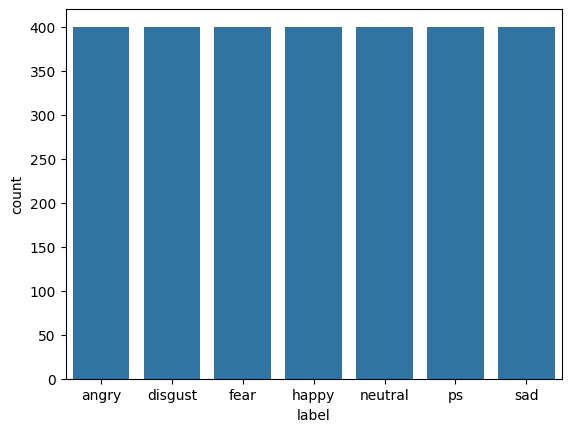

In [15]:
sns.countplot(data=df,x='label')

In [16]:
df

,speech,label,label_count
0,toronto-emotional-speech-set-tess\TESS Toronto...,angry,NaN
1,toronto-emotional-speech-set-tess\TESS Toronto...,angry,NaN
2,toronto-emotional-speech-set-tess\TESS Toronto...,angry,NaN
3,toronto-emotional-speech-set-tess\TESS Toronto...,angry,NaN
4,toronto-emotional-speech-set-tess\TESS Toronto...,angry,NaN
...,...,...,...
2795,toronto-emotional-speech-set-tess\TESS Toronto...,sad,NaN
2796,toronto-emotional-speech-set-tess\TESS Toronto...,sad,NaN
2797,toronto-emotional-speech-set-tess\TESS Toronto...,sad,NaN
2798,toronto-emotional-speech-set-tess\TESS Toronto...,sad,NaN


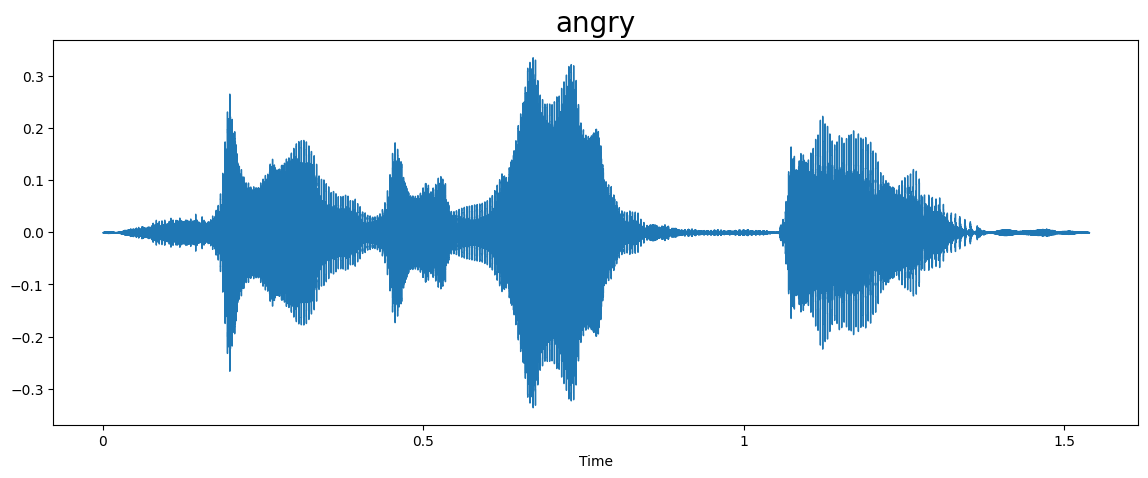

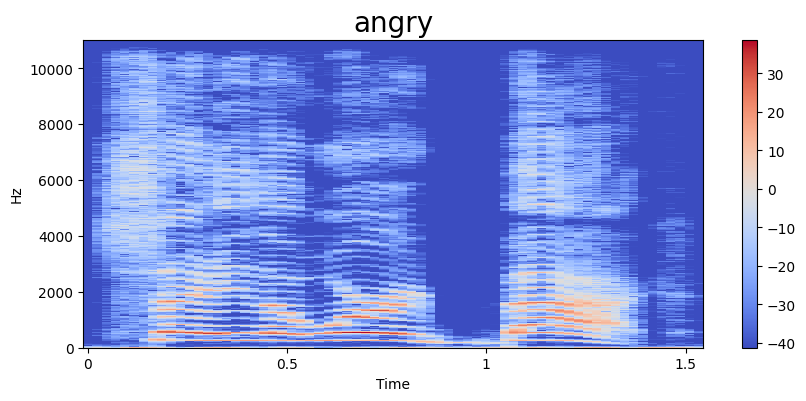

In [17]:
emotion = 'angry'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)

def waveplot(data, sampling_rate, emotion):
    plt.figure(figsize=(14, 5))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sampling_rate)
    plt.show()

def spectogram(data, sampling_rate, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.show()

# Call the functions
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

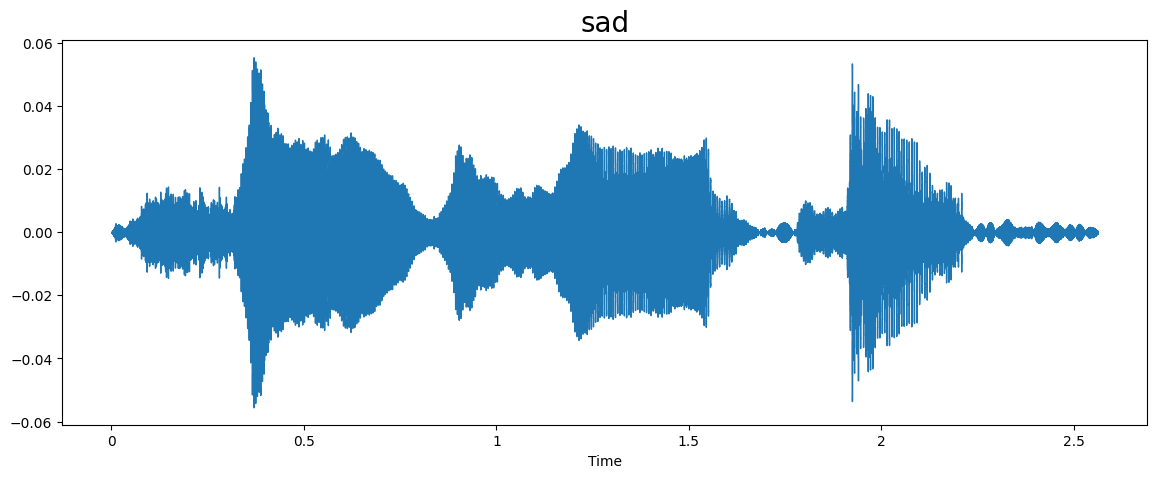

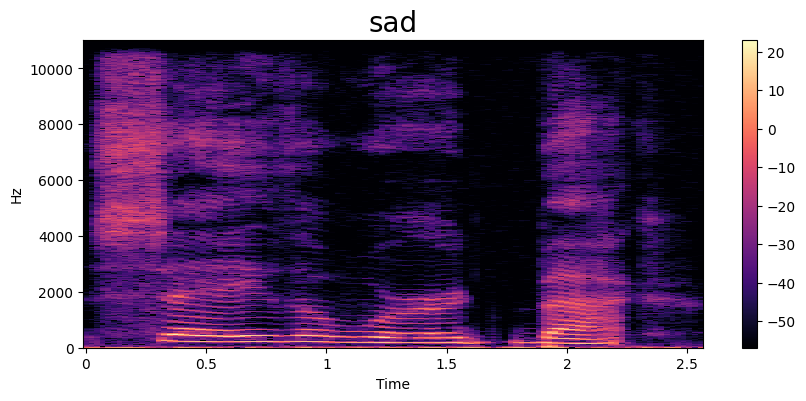

In [18]:
emotion = 'sad'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)

def waveplot(data, sampling_rate, emotion):
    plt.figure(figsize=(14, 5))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sampling_rate)
    plt.show()

def spectogram(data, sampling_rate, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.show()

# Call the functions
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

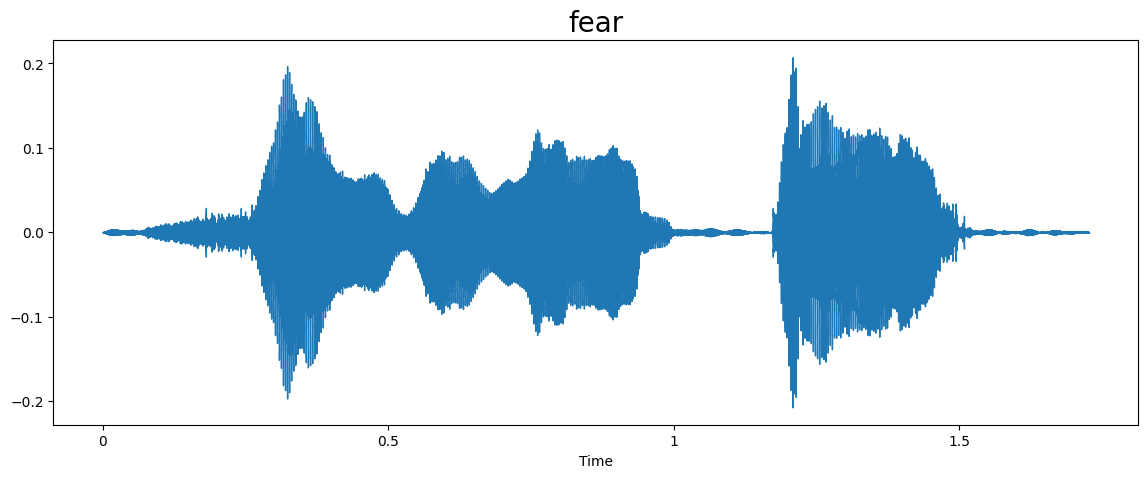

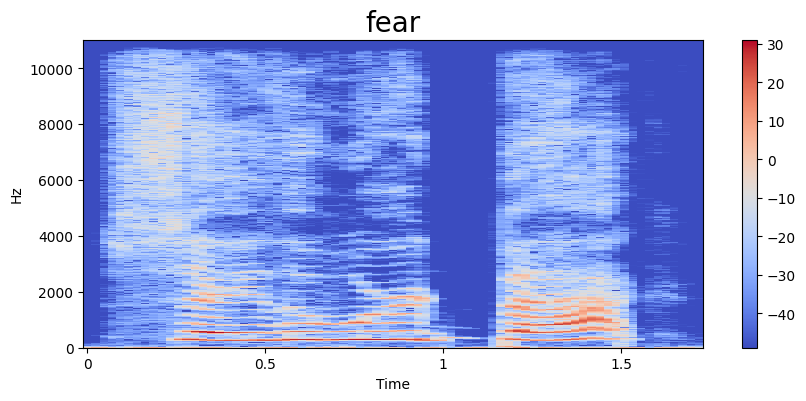

In [19]:
emotion = 'fear'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)

def waveplot(data, sampling_rate, emotion):
    plt.figure(figsize=(14, 5))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sampling_rate)
    plt.show()

def spectogram(data, sampling_rate, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.show()

# Call the functions
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


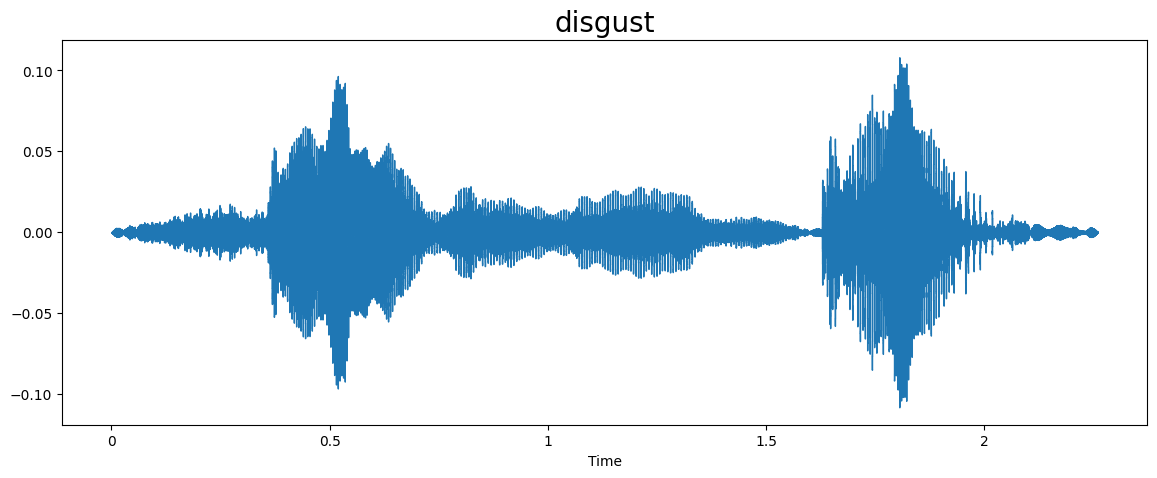

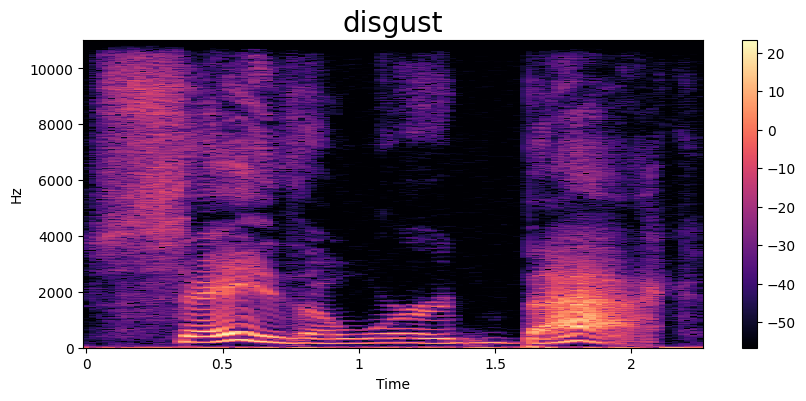

In [20]:
emotion = 'disgust'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)

def waveplot(data, sampling_rate, emotion):
    plt.figure(figsize=(14, 5))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sampling_rate)
    plt.show()

def spectogram(data, sampling_rate, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.show()

# Call the functions
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


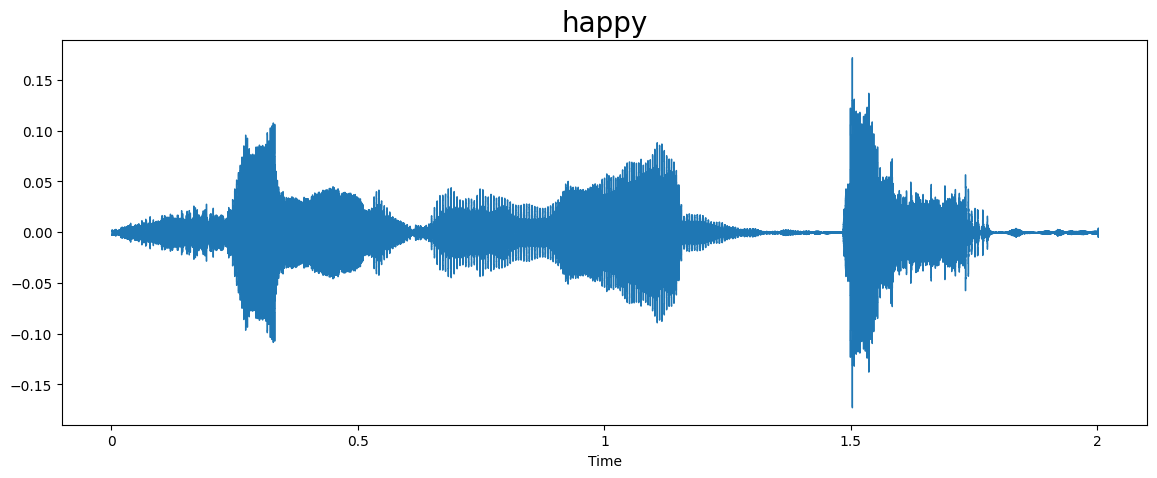

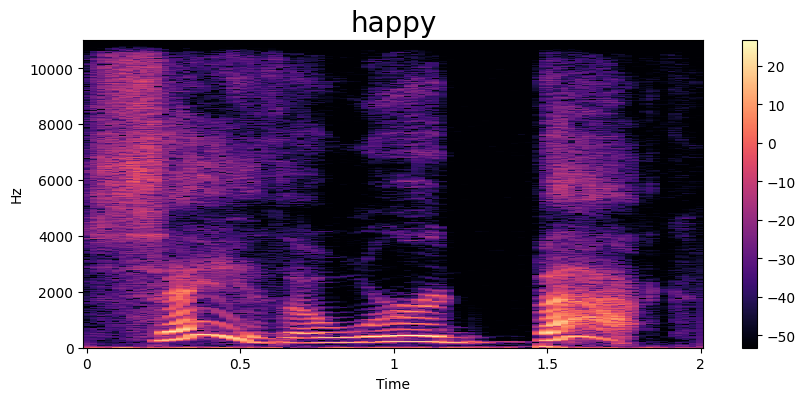

In [21]:
emotion = 'happy'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)

def waveplot(data, sampling_rate, emotion):
    plt.figure(figsize=(14, 5))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sampling_rate)
    plt.show()

def spectogram(data, sampling_rate, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.show()

# Call the functions
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)
 

In [22]:
def extract_mfcc(filename):
    y,sr=librosa.load(filename,duration=3,offset=0.5)
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [23]:
extract_mfcc(df['speech'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275649e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228456e+00, -5.57366014e-01, -1.83255327e+00,  2.02101544e-01,
        7.27550447e-01,  1.31773770e+00,  2.88633752e+00,  2.85579062e+00,
       -4.71292162e+00, -4.43651104e+00, -1.62115932e+00, -1.02398405e+01,
       -7.55126286e+00, -1.79688060e+00, -7.03765202e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169914e+01,  2.03489304e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722164e-01,  5.11131430e+00,
        9.56873894e+00,  5.45486879e+00,  2.50996351e+00, -1.82390714e+00,
        4.86896276e+00,  9.31392384e+00,  2.08914948e+00, -1.90649164e+00],
      dtype=float32)

In [24]:
x_mfcc = df['speech'].apply(lambda x:extract_mfcc(x))



In [25]:
x_mfcc 
x=[x for x in x_mfcc]
x=np.array(x)
x.shape


(2800, 40)

In [26]:
x=np.expand_dims(x,-1)
x.shape

(2800, 40, 1)

In [27]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[['label']])
y=y.toarray()
y.shape


(2800, 7)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=.2,random_state=42)


create lsmt model

In [29]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(123, return_sequences=False, input_shape=(40, 1)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 123)            │        61,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         2,112 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,628 (287.61 KB)

 Trainable params: 73,628 (287.61 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_val, y_val), 
                    epochs=30, 
                    batch_size=64)

Epoch 1/30


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(64, 7), output.shape=(64, 64)